In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
from sklearn.datasets import make_blobs

In [0]:
X, y = make_blobs(n_samples= 1000, n_features= 2, centers= 2)

In [89]:
X.shape, y.shape

((1000, 2), (1000,))

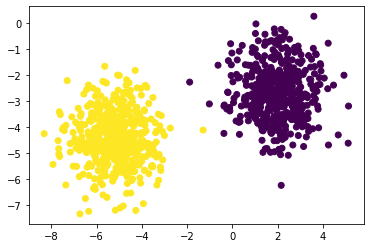

In [90]:
plt.scatter(X[:, 0], X[:, 1], c = y)
plt.show()

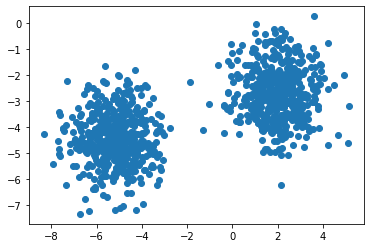

In [91]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [0]:
def k_means(colors, k = 2) :
    clusters = {}
    for i in range(k):
        cluster = {
            'center' : 10*(2*np.random.random((2, ))-1),
            'points' : [],
            'color' : colors[i]
        }
        clusters[i] = cluster      
    return clusters

In [0]:
def distance(x1, x2):
    return np.sqrt(np.sum((x1-x2)**2))

In [0]:
def assignPointToCluster(clusters, data, k = 2):    
    for i in range(data.shape[0]):
        cur_point = data[i]
        dist = []

        for ix in range(k):
            d = distance(cur_point, clusters[ix]['center'])
            dist.append(d)
        
        nearest = np.argmin(dist)
        clusters[nearest]['points'].append(cur_point)

    return clusters

In [0]:
def updateCluster(clusters, k = 2):
    for i in range(k):
        pnts = clusters[i]['points']
        pnts = np.array(pnts)

        if pnts.shape[0] > 0:
            new_center = pnts.mean(axis = 0)
            clusters[i]['center'] = new_center
            clusters[i]['points'] = []
            # print("center -->", end = " ")
            # print(new_center)
    return clusters

In [0]:
def plot_cluster(clusters, k = 2):
    for i in range(k) :
        pnts = clusters[i]['points']
        pnts = np.array(pnts)
        clr = clusters[i]['color']
        center = clusters[i]['center']
        
        if pnts.shape[0] > 0:
            plt.scatter(pnts[:, 0], pnts[:, 1], c = clr)

        plt.scatter(center[0], center[1], c = 'black', marker= '*')
    plt.show()

In [0]:
def K_means_fit(clusters, data, k = 2, iter = 5):
    for i in range(iter):
        clusters = assignPointToCluster(clusters, data, k=2)
        plot_cluster(clusters, k = 2)
        updateCluster(clusters, k = 2)
        print(clusters)

In [0]:
clusters = k_means(['red', 'blue'], k = 2)

In [105]:
clusters

{0: {'center': array([-2.63144864, -7.83401619]),
  'color': 'red',
  'points': []},
 1: {'center': array([9.60895249, 4.17671647]), 'color': 'blue', 'points': []}}

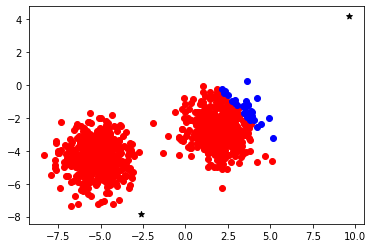

{0: {'center': array([-1.73439752, -3.64386403]), 'points': [], 'color': 'red'}, 1: {'center': array([ 3.53979238, -1.38340682]), 'points': [], 'color': 'blue'}}


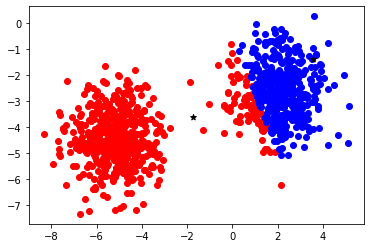

{0: {'center': array([-4.33903473, -4.29680532]), 'points': [], 'color': 'red'}, 1: {'center': array([ 2.26442762, -2.58052254]), 'points': [], 'color': 'blue'}}


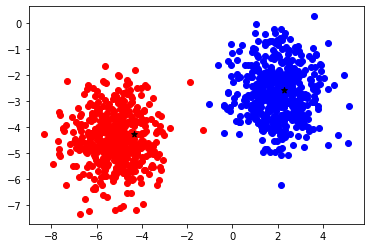

{0: {'center': array([-5.17106081, -4.46278503]), 'points': [], 'color': 'red'}, 1: {'center': array([ 2.00141698, -2.69935147]), 'points': [], 'color': 'blue'}}


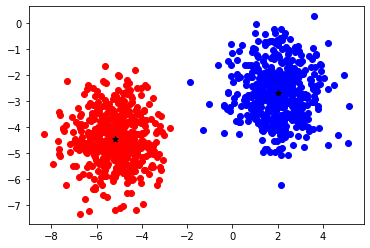

{0: {'center': array([-5.18540242, -4.46782301]), 'points': [], 'color': 'red'}, 1: {'center': array([ 1.98706869, -2.70137326]), 'points': [], 'color': 'blue'}}


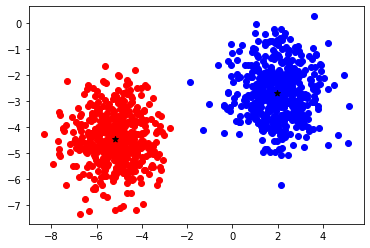

{0: {'center': array([-5.18540242, -4.46782301]), 'points': [], 'color': 'red'}, 1: {'center': array([ 1.98706869, -2.70137326]), 'points': [], 'color': 'blue'}}


In [106]:
K_means_fit(clusters, X, k = 2, iter= 5)

## From Sklearn

In [0]:
X, y = make_blobs(n_samples= 900, n_features= 2, centers= 5)

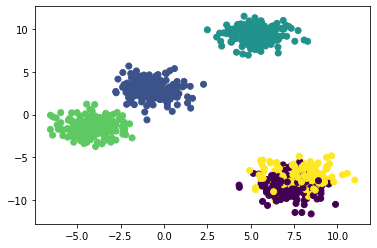

In [112]:
plt.scatter(X[:, 0], X[:, 1], c = y)
plt.show()

In [0]:
from sklearn.cluster import KMeans

In [0]:
inertial_distance = []

for i in range(2, 12):
    k_means = KMeans(n_clusters= i)
    k_means.fit(X)
    inertial_distance.append(k_means.inertia_)

In [116]:
inertial_distance

[20660.8425562422,
 4718.160566260895,
 1912.699521057938,
 1570.2201264780701,
 1419.9293935219957,
 1290.2136292133823,
 1159.7794195916078,
 1056.3957897411237,
 983.315713680609,
 910.1067024233255]

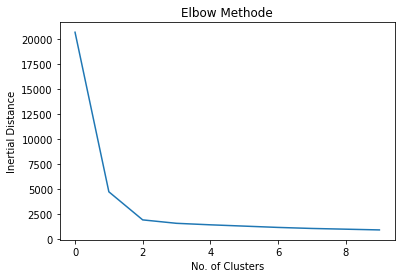

In [117]:
plt.plot(inertial_distance)
plt.title("Elbow Methode")
plt.ylabel("Inertial Distance")
plt.xlabel("No. of Clusters")
plt.show()

In [118]:
k_means = KMeans(n_clusters= 3)
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [0]:
y_pred = k_means.fit_predict(X)

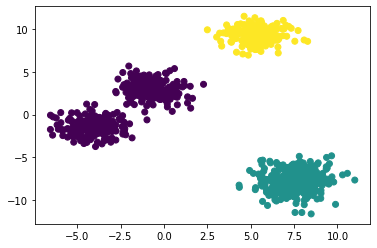

In [120]:
plt.scatter(X[:, 0], X[:, 1], c = y_pred)
plt.show()

In [121]:
y_pred

array([1, 0, 1, 2, 0, 0, 0, 2, 0, 1, 0, 0, 1, 1, 2, 1, 2, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 2, 2, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 2, 0, 2, 1, 0, 1, 2, 0, 1, 1, 1, 1, 0, 0, 0, 2, 2, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 2, 1, 1, 0, 0, 2, 2, 0, 0, 0, 1, 0,
       2, 1, 0, 1, 2, 2, 0, 1, 1, 0, 0, 2, 2, 1, 2, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 2, 1, 0, 1, 1, 1, 1, 0, 2, 2, 0, 0, 0, 2, 2, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 2, 1, 1, 0, 1, 0, 2, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 2, 2, 1, 1, 0, 0, 0, 2, 2, 0, 0, 2, 0,
       2, 1, 0, 2, 2, 0, 1, 1, 2, 0, 2, 1, 2, 2, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 2, 0, 1, 0, 2, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 2, 1, 1, 1, 1, 1, 0, 1, 0, 1, 2, 0, 1, 1,
       0, 0, 1, 0, 2, 0, 1, 1, 0, 1, 0, 2, 1, 0, 1, 2, 0, 1, 2, 1, 1, 1,
       2, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 2, 0, 2, 2, 1, 2, 0, 1, 1, 0,
       1, 1, 2, 0, 2, 2, 0, 1, 2, 2, 1, 1, 0, 1, 1,